In [1]:
from keras.layers import Input, Dense,Conv2D, Dropout, Flatten, Reshape,Conv2DTranspose
from keras.models import Model
import numpy as np
import pandas as pd

# this is the size of our encoded representations
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
reshape = Reshape((28,28,1))(input_img)
# "encoded" is the encoded representation of the input
CNN_encode = Conv2D(16, kernel_size = (3,3))(reshape)
dropout = Dropout(0.4)(CNN_encode)
flat = Flatten()(dropout)
encoded = Dense(encoding_dim, activation='relu')(flat)

dense1 = Dense(5408,activation= 'relu')(encoded)
reshape2 = Reshape((26,26,8))(dense1)
CNN_decode = Conv2DTranspose(1, kernel_size = (3,3))(reshape2)
dropout2 = Dropout(0.4) (CNN_decode)
flat2 = Flatten()(dropout2)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid', name = "idk")(flat2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.
/home/linuxbrew/.linuxbrew/opt/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/linuxbrew/.linuxbrew/opt/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_2 (Dense)              (None, 5408)              178464    
__________

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
d1 = autoencoder.layers[-1]
d2 = autoencoder.layers[-2]
d3 = autoencoder.layers[-3]
d4 = autoencoder.layers[-4]
d5 = autoencoder.layers[-5]
d6 = autoencoder.layers[-6]
# create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder = Model(encoded_input,d1(d2(d3(d4(d5(d6(encoded_input)))))))

In [4]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                346144    
Total params: 346,304
Trainable params: 346,304
Non-trainable params: 0
_________________________________________________________________


In [5]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5408)              178464    
_________________________________________________________________
reshape_2 (Reshape)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         73        
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
idk (Dense)                  (None, 784)               615440    
Total para

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
pd1 =pd.read_csv("fashion-mnist_train.csv")
x_values = pd1.drop(['label'], axis=1)
x_train = x_values.as_matrix()
y_train = pd1['label'].tolist()

pd2 =pd.read_csv("fashion-mnist_test.csv")
x_values = pd2.drop(['label'], axis=1)
x_test = x_values.as_matrix()
y_test = pd2['label'].tolist()

/home/linuxbrew/.linuxbrew/opt/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/linuxbrew/.linuxbrew/opt/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=120,
                batch_size=256,
                shuffle=True)


Epoch 1/120
60000/60000 [==============================] - 42s 695us/step - loss: 0.4936
Epoch 2/120
60000/60000 [==============================] - 41s 680us/step - loss: 0.3749
Epoch 3/120
60000/60000 [==============================] - 41s 676us/step - loss: 0.3501
Epoch 4/120
60000/60000 [==============================] - 41s 677us/step - loss: 0.3400
Epoch 5/120
60000/60000 [==============================] - 41s 678us/step - loss: 0.3334
Epoch 6/120
60000/60000 [==============================] - 41s 679us/step - loss: 0.3282
Epoch 7/120
60000/60000 [==============================] - 40s 675us/step - loss: 0.3244
Epoch 8/120
60000/60000 [==============================] - 43s 720us/step - loss: 0.3211
Epoch 9/120
60000/60000 [==============================] - 43s 714us/step - loss: 0.3187
Epoch 10/120
60000/60000 [==============================] - 43s 709us/step - loss: 0.3166
Epoch 11/120
60000/60000 [==============================] - 42s 708us/step - loss: 0.3144
Epoch 12/120
60000/

60000/60000 [==============================] - 40s 675us/step - loss: 0.2836
Epoch 93/120
60000/60000 [==============================] - 41s 678us/step - loss: 0.2834
Epoch 94/120
60000/60000 [==============================] - 40s 673us/step - loss: 0.2833
Epoch 95/120
60000/60000 [==============================] - 40s 673us/step - loss: 0.2832
Epoch 96/120
60000/60000 [==============================] - 40s 674us/step - loss: 0.2831
Epoch 97/120
60000/60000 [==============================] - 41s 675us/step - loss: 0.2830
Epoch 98/120
60000/60000 [==============================] - 42s 702us/step - loss: 0.2829
Epoch 99/120
60000/60000 [==============================] - 42s 692us/step - loss: 0.2829
Epoch 100/120
60000/60000 [==============================] - 41s 681us/step - loss: 0.2828
Epoch 101/120
60000/60000 [==============================] - 41s 679us/step - loss: 0.2827
Epoch 102/120
60000/60000 [==============================] - 41s 680us/step - loss: 0.2825
Epoch 103/120
60000/

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ACTUAL


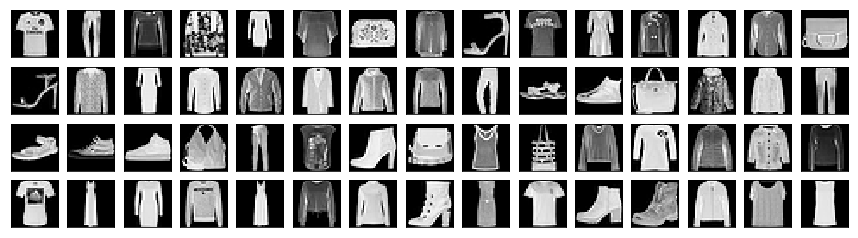

GENERATED


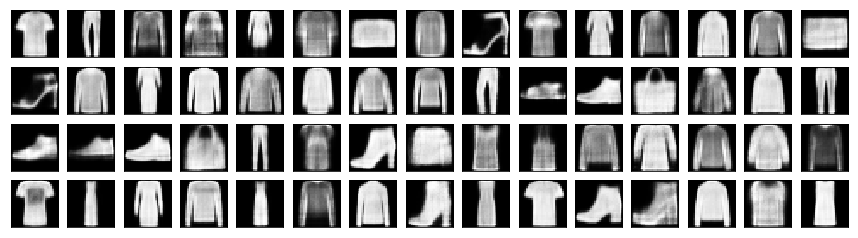

In [12]:
import matplotlib.pyplot as plt

n = 60  # how many digits we will display
print("ACTUAL")
plt.figure(figsize=(15, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, 15, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("GENERATED")
plt.figure(figsize=(15, 4))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(4, 15, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
decoded_imgs.shape

(10000, 784)

In [15]:
#Column headings for files
headings = []
for i in range (1, 785):
    headings.append("Pixel"+str(i))

In [17]:
#COnvert to dataframe and write to file
dataset = pd.DataFrame(data = decoded_imgs, columns= headings)
labels = pd.DataFrame(pd2['label'])
final_VAE = labels.join(dataset)
final_VAE.head()

,label,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
0,0,3.403997e-05,1.537691e-05,4.809741e-05,6.218330e-05,1.218491e-04,2.496806e-04,0.000678,0.000886,0.002377,...,0.505507,0.455862,0.283724,0.012244,0.001772,6.239717e-04,3.406225e-04,2.271170e-04,3.144736e-04,3.233146e-05
1,1,5.684114e-10,2.149537e-09,1.095210e-08,4.225683e-08,1.632970e-07,4.003881e-07,0.000040,0.000121,0.000531,...,0.192749,0.006072,0.000171,0.000011,0.000001,5.526973e-07,5.953044e-08,1.615029e-08,1.282980e-08,2.232480e-09
2,2,1.616757e-04,1.479217e-04,1.121230e-04,7.044449e-04,1.324151e-03,2.199443e-03,0.010042,0.031930,0.083342,...,0.012680,0.010511,0.011466,0.056660,0.164056,1.051018e-01,3.800013e-02,6.069808e-03,1.193843e-03,1.433704e-04
3,2,1.552401e-03,3.928608e-04,9.058719e-04,1.945799e-03,7.553065e-03,8.920582e-03,0.049108,0.075858,0.254271,...,0.301320,0.345318,0.300489,0.296267,0.308793,3.533405e-01,1.959523e-01,8.247220e-02,9.107692e-03,4.659851e-04
4,3,1.083769e-07,3.876267e-07,1.320997e-06,1.172577e-06,3.004754e-06,2.281762e-05,0.000136,0.000263,0.001435,...,0.005774,0.001823,0.004597,0.004283,0.003189,1.165046e-03,2.130124e-04,2.157663e-05,1.719886e-06,6.777855e-07


In [18]:
final_VAE.to_csv("VAE_output.csv", index = False)

In [19]:
from keras.models import load_model
autoencoder.save('autoencoder.h5')
decoder.save('decoder.h5')
encoder.save('encoder.h5')